In [1]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import ttest_ind

In [2]:
#!pip install statannot

In [3]:
#Load the clean ethereum transaction dataset
df = pd.read_csv('transaction_dataset_cleaned.csv')
print(df.shape)

(8715, 31)


In [4]:
#Print the first several rows of the data
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 total ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,3.560317e+07,30.0,54.0,58.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809e+00,1.0,5.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000e+00,0.0,7.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,1.141223e+04,2.0,11.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,1.235399e+05,4.0,23.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220


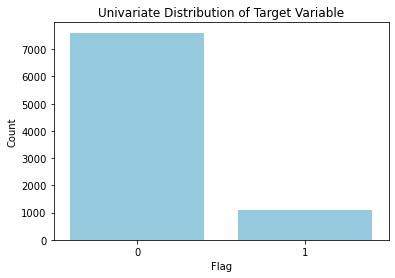

In [5]:
#Univariate Chart of Target 
sns.countplot(x="FLAG", data=df, color="skyblue")
plt.xlabel("Flag")
plt.ylabel("Count")
plt.title("Univariate Distribution of Target Variable")
plt.show()

In [6]:
#Total Nonfraudulent vs Fraudulent Accounts
df['FLAG'].value_counts() 

0    7608
1    1107
Name: FLAG, dtype: int64

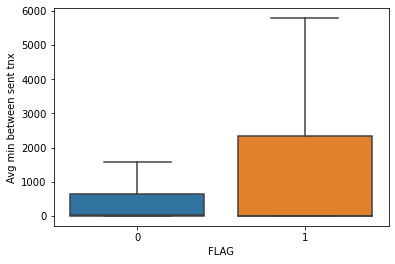

count      7608.000000
mean       5431.464978
std       22526.408095
min           0.000000
25%           0.000000
50%          22.740000
75%         630.422500
max      430287.670000
Name: Avg min between sent tnx, dtype: float64
count      1107.000000
mean       6327.846350
std       22029.309609
min           0.000000
25%           0.000000
50%           0.000000
75%        2323.715000
max      262976.000000
Name: Avg min between sent tnx, dtype: float64
(-1.2404597955827366, 0.21483877749687116)


In [7]:
#'Avg min between sent tnx' vs target 
sns.boxplot(y="Avg min between sent tnx", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for Avg min between sent tnx
print((df.loc[df["FLAG"] == 0,"Avg min between sent tnx"]).describe())
print((df.loc[df["FLAG"] == 1,"Avg min between sent tnx"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Avg min between sent tnx"], df.loc[df["FLAG"] == 1,"Avg min between sent tnx"])
print((stat, p))

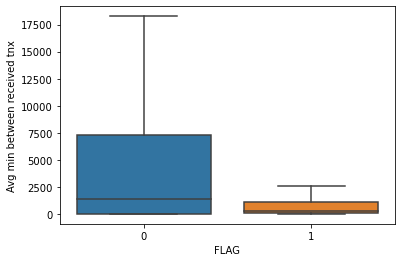

count      7608.000000
mean       9420.261551
std       25092.320271
min           0.000000
25%           0.000000
50%        1410.955000
75%        7315.922500
max      482175.490000
Name: Avg min between received tnx, dtype: float64
count     1107.000000
mean      2218.985438
std       7612.258858
min          0.000000
25%         48.755000
50%        278.140000
75%       1060.365000
max      97592.180000
Name: Avg min between received tnx, dtype: float64
(9.484944349412594, 3.0698623786265935e-21)


In [8]:
#'Avg min between received tnx' vs target 
sns.boxplot(y="Avg min between received tnx", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for Avg min between received tnx
print((df.loc[df["FLAG"] == 0,"Avg min between received tnx"]).describe())
print((df.loc[df["FLAG"] == 1,"Avg min between received tnx"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
from scipy.stats import ttest_ind
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Avg min between received tnx"], df.loc[df["FLAG"] == 1,"Avg min between received tnx"])
print((stat, p))

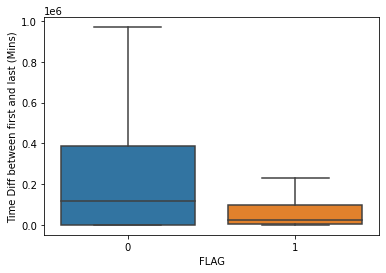

count    7.608000e+03
mean     2.642089e+05
std      3.473226e+05
min      0.000000e+00
25%      3.206700e+02
50%      1.165860e+05
75%      3.880748e+05
max      1.954861e+06
Name: Time Diff between first and last (Mins), dtype: float64
count      1107.000000
mean      82250.519350
std      125572.777553
min           0.000000
25%        5593.950000
50%       24175.050000
75%       96282.800000
max      791866.280000
Name: Time Diff between first and last (Mins), dtype: float64
(17.26646502050153, 1.0357044011079433e-65)


In [9]:
#'Time Diff between first and last (Mins)' vs target 
ax = sns.boxplot(y="Time Diff between first and last (Mins)", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for Time Diff between first and last (Mins)
print((df.loc[df["FLAG"] == 0,"Time Diff between first and last (Mins)"]).describe())
print((df.loc[df["FLAG"] == 1,"Time Diff between first and last (Mins)"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Time Diff between first and last (Mins)"], df.loc[df["FLAG"] == 1,"Time Diff between first and last (Mins)"])
print((stat, p))

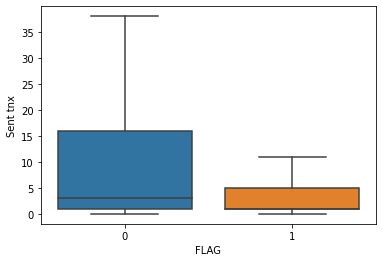

count     7608.000000
mean       143.007361
std        834.165992
min          0.000000
25%          1.000000
50%          3.000000
75%         16.000000
max      10000.000000
Name: Sent tnx, dtype: float64
count    1107.000000
mean        9.232159
std        30.053408
min         0.000000
25%         1.000000
50%         1.000000
75%         5.000000
max       472.000000
Name: Sent tnx, dtype: float64
(5.335003064051366, 9.794221469264927e-08)


In [10]:
#'Sent tnx' vs target 
sns.boxplot(y="Sent tnx", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for Sent tnx
print((df.loc[df["FLAG"] == 0,"Sent tnx"]).describe())
print((df.loc[df["FLAG"] == 1,"Sent tnx"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Sent tnx"], df.loc[df["FLAG"] == 1,"Sent tnx"])
print((stat, p))

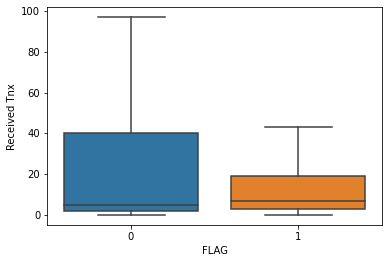

count     7608.000000
mean       198.082282
std       1033.749944
min          0.000000
25%          2.000000
50%          5.000000
75%         40.000000
max      10000.000000
Name: Received Tnx, dtype: float64
count    1107.000000
mean       39.089431
std       342.430067
min         0.000000
25%         3.000000
50%         7.000000
75%        19.000000
max      9999.000000
Name: Received Tnx, dtype: float64
(5.076655690392178, 3.9208259344839376e-07)


In [11]:
#'Received Tnx' vs target 
sns.boxplot(y="Received Tnx", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for Received Tnx
print((df.loc[df["FLAG"] == 0,"Received Tnx"]).describe())
print((df.loc[df["FLAG"] == 1,"Received Tnx"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Received Tnx"], df.loc[df["FLAG"] == 1,"Received Tnx"])
print((stat, p))

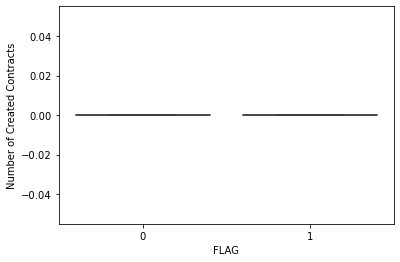

7512


In [12]:
#'Number of Created Contracts' vs target 
sns.boxplot(y="Number of Created Contracts", x= "FLAG", data=df, showfliers=False)
plt.show()

#Number of Created Contracts: Number of values equal to 0
print(df[df["Number of Created Contracts"] == 0].value_counts().sum())

The vast majority of values in the 'Number of Created Contracts' column is equal 0 (i.e., 86%). This explains the resulting boxplot above; as such, the probability that this feature exhibits any predictive power will be low.

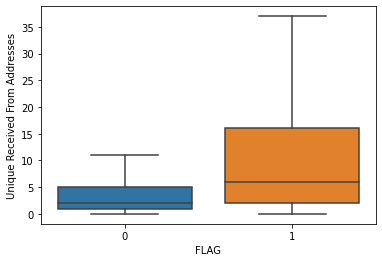

count    7608.000000
mean       33.867902
std       325.721833
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      9999.000000
Name: Unique Received From Addresses, dtype: float64
count    1107.000000
mean       20.683830
std        95.786887
min         0.000000
25%         2.000000
50%         6.000000
75%        16.000000
max      2001.000000
Name: Unique Received From Addresses, dtype: float64
(1.338264352511711, 0.1808451994458736)


In [13]:
#'Unique Received From Addresses' vs target 
sns.boxplot(y="Unique Received From Addresses", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for Unique Received From Addresses
print((df.loc[df["FLAG"] == 0,"Unique Received From Addresses"]).describe())
print((df.loc[df["FLAG"] == 1,"Unique Received From Addresses"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Unique Received From Addresses"], df.loc[df["FLAG"] == 1,"Unique Received From Addresses"])
print((stat, p))

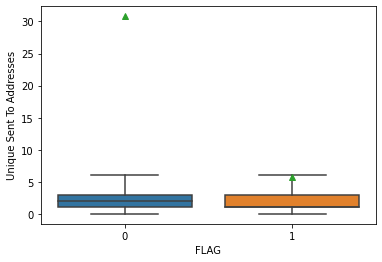

count    7608.000000
mean       30.806914
std       279.405705
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      6711.000000
Name: Unique Sent To Addresses, dtype: float64
count    1107.000000
mean        5.747064
std        16.030181
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       280.000000
Name: Unique Sent To Addresses, dtype: float64
(2.983264845053782, 0.0028598135199689144)


In [45]:
#'Unique Sent To Addresses' vs target 
sns.boxplot(y="Unique Sent To Addresses", x= "FLAG", data=df, showfliers=False, showmeans=True)
plt.show()

#Stats for Unique Sent To Addresses
print((df.loc[df["FLAG"] == 0,"Unique Sent To Addresses"]).describe())
print((df.loc[df["FLAG"] == 1,"Unique Sent To Addresses"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Unique Sent To Addresses"], df.loc[df["FLAG"] == 1,"Unique Sent To Addresses"])
print((stat, p))

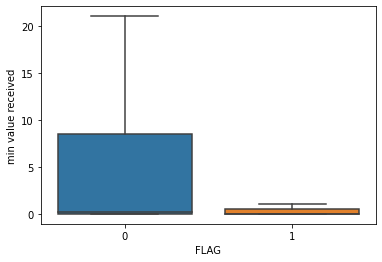

count     7608.000000
mean        47.746222
std        234.958521
min          0.000000
25%          0.006873
50%          0.160172
75%          8.520528
max      10000.000000
Name: min value received, dtype: float64
count     1107.000000
mean        55.535874
std        735.215520
min          0.000000
25%          0.001353
50%          0.036364
75%          0.490000
max      10000.000000
Name: min value received, dtype: float64
(-0.708514378772572, 0.47864484069236857)


In [15]:
#'min value received' vs target 
sns.boxplot(y="min value received", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for min value received
print((df.loc[df["FLAG"] == 0,"min value received"]).describe())
print((df.loc[df["FLAG"] == 1,"min value received"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"min value received"], df.loc[df["FLAG"] == 1,"min value received"])
print((stat, p))

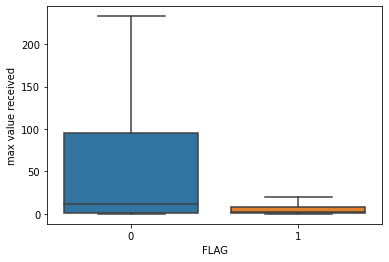

count      7608.000000
mean        660.033710
std       14787.787392
min           0.000000
25%           1.309080
50%          12.251935
75%          95.094367
max      800000.000000
Name: max value received, dtype: float64
count     1107.000000
mean        97.839840
std        978.607311
min          0.000000
25%          0.920950
50%          2.490000
75%          8.451621
max      18998.000000
Name: max value received, dtype: float64
(1.2644370256237065, 0.2061070320573773)


In [16]:
#'max value received' vs target 
sns.boxplot(y="max value received", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for max value received
print((df.loc[df["FLAG"] == 0,"max value received"]).describe())
print((df.loc[df["FLAG"] == 1,"max value received"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"max value received"], df.loc[df["FLAG"] == 1,"max value received"])
print((stat, p))

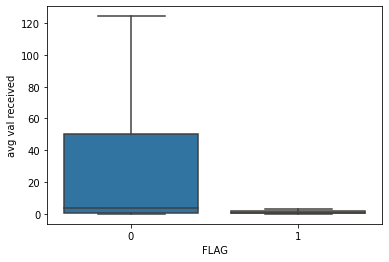

count      7608.000000
mean        119.448561
std        3267.352003
min           0.000000
25%           0.704717
50%           3.778617
75%          50.500000
max      283618.831600
Name: avg val received, dtype: float64
count     1107.000000
mean        66.613372
std        767.047279
min          0.000000
25%          0.500000
50%          0.871760
75%          1.549034
max      10000.000000
Name: avg val received, dtype: float64
(0.5358543888457945, 0.5920728674884401)


In [17]:
#'avg val received' vs target 
sns.boxplot(y="avg val received", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for avg val received
print((df.loc[df["FLAG"] == 0,"avg val received"]).describe())
print((df.loc[df["FLAG"] == 1,"avg val received"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"avg val received"], df.loc[df["FLAG"] == 1,"avg val received"])
print((stat, p))

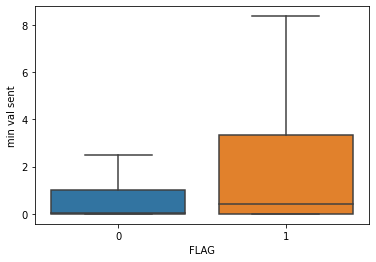

count     7608.000000
mean         4.334282
std        146.082047
min          0.000000
25%          0.000000
50%          0.057606
75%          0.992923
max      12000.000000
Name: min val sent, dtype: float64
count    1107.000000
mean       11.069850
std       155.116603
min         0.000000
25%         0.000215
50%         0.440000
75%         3.357600
max      4999.999118
Name: min val sent, dtype: float64
(-1.4218900978854023, 0.15509395191787476)


In [18]:
#'min val sent' vs target 
sns.boxplot(y="min val sent", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for min val sent
print((df.loc[df["FLAG"] == 0,"min val sent"]).describe())
print((df.loc[df["FLAG"] == 1,"min val sent"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"min val sent"], df.loc[df["FLAG"] == 1,"min val sent"])
print((stat, p))

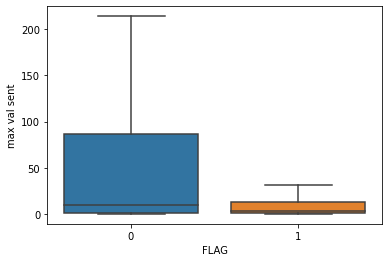

count      7608.000000
mean        394.275523
std        7531.747683
min           0.000000
25%           0.544818
50%           9.772597
75%          85.998956
max      520000.000000
Name: max val sent, dtype: float64
count     1107.000000
mean        63.004730
std        710.971516
min          0.000000
25%          0.549508
50%          3.449139
75%         13.000000
max      20000.000000
Name: max val sent, dtype: float64
(1.462375011603988, 0.1436745401502382)


In [19]:
#'max val sent' vs target 
sns.boxplot(y="max val sent", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for max val sent
print((df.loc[df["FLAG"] == 0,"max val sent"]).describe())
print((df.loc[df["FLAG"] == 1,"max val sent"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"max val sent"], df.loc[df["FLAG"] == 1,"max val sent"])
print((stat, p))

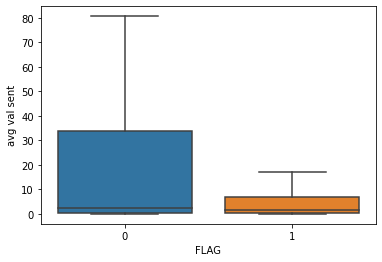

count     7608.000000
mean        52.940096
std        229.296155
min          0.000000
25%          0.204415
50%          2.330882
75%         33.666149
max      12000.000000
Name: avg val sent, dtype: float64
count     1107.000000
mean        28.055187
std        374.349848
min          0.000000
25%          0.332013
50%          1.751049
75%          7.095461
max      10162.666670
Name: avg val sent, dtype: float64
(3.065285009086641, 0.002181280891613559)


In [20]:
#'avg val sent' vs target 
sns.boxplot(y="avg val sent", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for avg val sent
print((df.loc[df["FLAG"] == 0,"avg val sent"]).describe())
print((df.loc[df["FLAG"] == 1,"avg val sent"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"avg val sent"], df.loc[df["FLAG"] == 1,"avg val sent"])
print((stat, p))

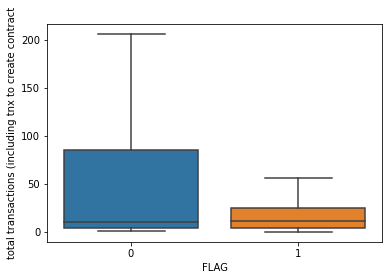

count     7608.000000
mean       345.886172
std       1489.636546
min          1.000000
25%          4.000000
50%         10.000000
75%         85.000000
max      19995.000000
Name: total transactions (including tnx to create contract, dtype: float64
count     1107.000000
mean        48.366757
std        345.450333
min          0.000000
25%          4.000000
50%         11.000000
75%         25.000000
max      10000.000000
Name: total transactions (including tnx to create contract, dtype: float64
(6.619058720777696, 3.8284048033408584e-11)


In [21]:
#'total transactions (including tnx to create contract' vs target 
sns.boxplot(y="total transactions (including tnx to create contract", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for total transactions (including tnx to create contract' vs target 
print((df.loc[df["FLAG"] == 0,"total transactions (including tnx to create contract"]).describe())
print((df.loc[df["FLAG"] == 1,"total transactions (including tnx to create contract"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"total transactions (including tnx to create contract"], df.loc[df["FLAG"] == 1,"total transactions (including tnx to create contract"])
print((stat, p))

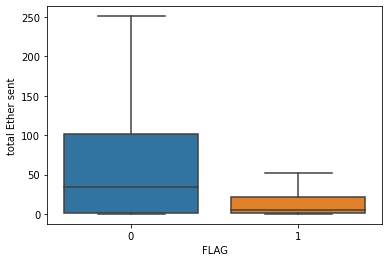

count    7.608000e+03
mean     1.310101e+04
std      4.074870e+05
min      0.000000e+00
25%      9.984939e-01
50%      3.414514e+01
75%      1.009990e+02
max      2.858096e+07
Name: total Ether sent, dtype: float64
count     1107.000000
mean       158.945258
std       2349.378567
min          0.000000
25%          0.710280
50%          4.364136
75%         21.469236
max      70020.000000
Name: total Ether sent, dtype: float64
(1.0566744966625956, 0.2906894645652587)


In [22]:
#'total Ether sent' vs target 
sns.boxplot(y="total Ether sent", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for total Ether sent 
print((df.loc[df["FLAG"] == 0,"total Ether sent"]).describe())
print((df.loc[df["FLAG"] == 1,"total Ether sent"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"total Ether sent"], df.loc[df["FLAG"] == 1,"total Ether sent"])
print((stat, p))

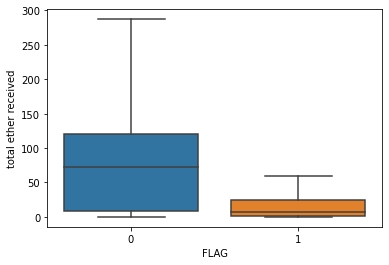

count    7.608000e+03
mean     1.500287e+04
std      4.141634e+05
min      0.000000e+00
25%      8.597269e+00
50%      7.195214e+01
75%      1.204323e+02
max      2.858159e+07
Name: total ether received, dtype: float64
count     1107.000000
mean       175.790007
std       1674.959916
min          0.000000
25%          1.547810
50%          6.574424
75%         24.923989
max      43479.456230
Name: total ether received, dtype: float64
(1.191066500658308, 0.233659924876364)


In [23]:
#'total ether received' vs target 
sns.boxplot(y="total ether received", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for total ether received 
print((df.loc[df["FLAG"] == 0,"total ether received"]).describe())
print((df.loc[df["FLAG"] == 1,"total ether received"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"total ether received"], df.loc[df["FLAG"] == 1,"total ether received"])
print((stat, p))

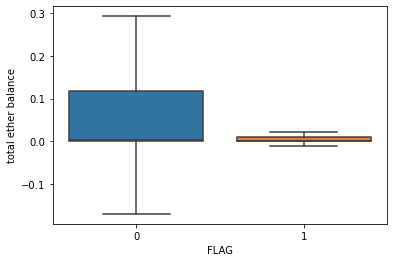

count    7.608000e+03
mean     1.901864e+03
std      2.757165e+05
min     -1.560535e+07
25%      9.842180e-04
50%      2.200000e-03
75%      1.182233e-01
max      1.428864e+07
Name: total ether balance, dtype: float64
count     1107.000000
mean        16.844749
std       2277.109347
min     -70019.914950
25%          0.000861
50%          0.001722
75%          0.010000
max      12991.456230
Name: total ether balance, dtype: float64
(0.2274591766256888, 0.820072046438622)


In [24]:
#'total ether balance' vs target 
sns.boxplot(y="total ether balance", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for total ether balance
print((df.loc[df["FLAG"] == 0,"total ether balance"]).describe())
print((df.loc[df["FLAG"] == 1,"total ether balance"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"total ether balance"], df.loc[df["FLAG"] == 1,"total ether balance"])
print((stat, p))

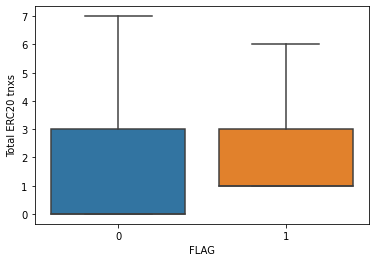

count     7608.000000
mean        41.294427
std        486.634395
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max      10001.000000
Name: Total ERC20 tnxs, dtype: float64
count    1107.000000
mean       10.584463
std        42.058094
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       567.000000
Name: Total ERC20 tnxs, dtype: float64
(2.098424415555079, 0.03589638644748281)


In [25]:
#'Total ERC20 tnxs' vs target 
sns.boxplot(y="Total ERC20 tnxs", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for total ether balance
print((df.loc[df["FLAG"] == 0,"Total ERC20 tnxs"]).describe())
print((df.loc[df["FLAG"] == 1,"Total ERC20 tnxs"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Total ERC20 tnxs"], df.loc[df["FLAG"] == 1,"Total ERC20 tnxs"])
print((stat, p))

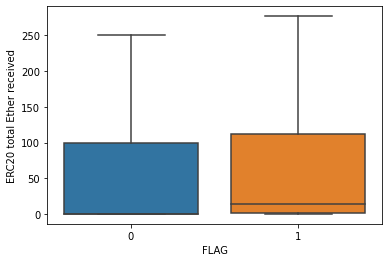

count    7.608000e+03
mean     1.502703e+08
std      1.146729e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+02
max      1.000020e+12
Name: ERC20 total Ether received, dtype: float64
count    1.107000e+03
mean     2.106888e+07
std      6.329366e+08
min      0.000000e+00
25%      1.337000e+00
50%      1.337000e+01
75%      1.123700e+02
max      2.100000e+10
Name: ERC20 total Ether received, dtype: float64
(0.3747681776704088, 0.7078420038541067)


In [26]:
#'ERC20 total Ether received' vs target 
sns.boxplot(y="ERC20 total Ether received", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for total ether balance
print((df.loc[df["FLAG"] == 0,"ERC20 total Ether received"]).describe())
print((df.loc[df["FLAG"] == 1,"ERC20 total Ether received"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"ERC20 total Ether received"], df.loc[df["FLAG"] == 1,"ERC20 total Ether received"])
print((stat, p))

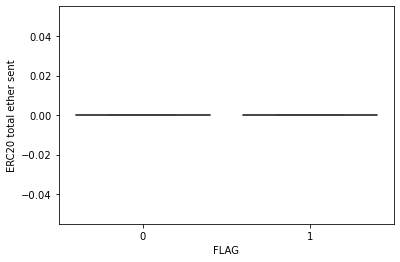

7172


In [27]:
#'ERC20 total ether sent' vs target 
sns.boxplot(y="ERC20 total ether sent", x= "FLAG", data=df, showfliers=False)
plt.show()

#ERC20 total ether sent: Number of values equal to 0
print(df[df["ERC20 total ether sent"] == 0].value_counts().sum())

The vast majority of values in the 'ERC20 total ether sent' column is equal 0 (i.e., 82%). This explains the resulting boxplot above; as such, the probability that this feature exhibits any predictive power will be low.

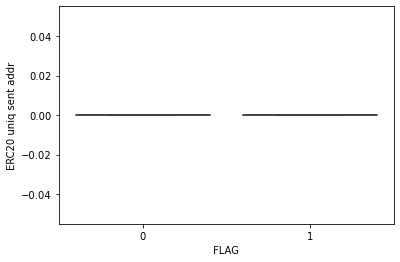

7172


In [28]:
#'ERC20 uniq sent addr' vs target 
sns.boxplot(y="ERC20 uniq sent addr", x= "FLAG", data=df, showfliers=False)
plt.show()

#ERC20 uniq sent addr: Number of values equal to 0
print(df[df["ERC20 uniq sent addr"] == 0].value_counts().sum())

The vast majority of values in the 'ERC20 uniq sent addr' column is equal 0 (i.e., 82%). This explains the resulting boxplot above; as such, the probability that this feature exhibits any predictive power will be low.

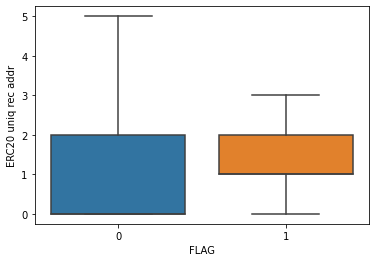

count    7608.000000
mean        8.223055
std        88.847597
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      4293.000000
Name: ERC20 uniq rec addr, dtype: float64
count    1107.000000
mean        4.877145
std        14.871034
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       188.000000
Name: ERC20 uniq rec addr, dtype: float64
(1.2503693122018968, 0.21119824815492896)


In [29]:
#'ERC20 uniq rec addr' vs target 
sns.boxplot(y="ERC20 uniq rec addr", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for ERC20 uniq rec addr
print((df.loc[df["FLAG"] == 0,"ERC20 uniq rec addr"]).describe())
print((df.loc[df["FLAG"] == 1,"ERC20 uniq rec addr"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"ERC20 uniq rec addr"], df.loc[df["FLAG"] == 1,"ERC20 uniq rec addr"])
print((stat, p))

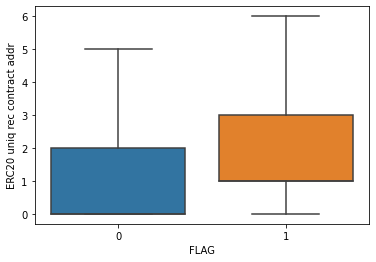

count    7608.000000
mean        5.027734
std        17.934104
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       782.000000
Name: ERC20 uniq rec contract addr, dtype: float64
count    1107.000000
mean        4.829268
std        14.052946
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       213.000000
Name: ERC20 uniq rec contract addr, dtype: float64
(0.35276865994338796, 0.7242704140601284)


In [30]:
#'ERC20 uniq rec contract addr' vs target 
sns.boxplot(y="ERC20 uniq rec contract addr", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for ERC20 uniq rec addr
print((df.loc[df["FLAG"] == 0,"ERC20 uniq rec contract addr"]).describe())
print((df.loc[df["FLAG"] == 1,"ERC20 uniq rec contract addr"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"ERC20 uniq rec contract addr"], df.loc[df["FLAG"] == 1,"ERC20 uniq rec contract addr"])
print((stat, p))

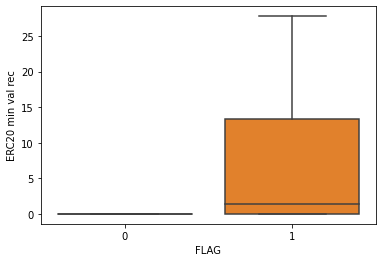

count      7608.000000
mean        409.311928
std       16695.465610
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      990000.000000
Name: ERC20 min val rec, dtype: float64
count      1107.000000
mean       1138.144383
std       20117.047396
min           0.000000
25%           0.000000
50%           1.337000
75%          13.370000
max      567580.000000
Name: ERC20 min val rec, dtype: float64
(-1.3197540369290204, 0.1869518260187807)


In [31]:
#'ERC20 min val rec' vs target 
sns.boxplot(y="ERC20 min val rec", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for ERC20 min val rec
print((df.loc[df["FLAG"] == 0,"ERC20 min val rec"]).describe())
print((df.loc[df["FLAG"] == 1,"ERC20 min val rec"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"ERC20 min val rec"], df.loc[df["FLAG"] == 1,"ERC20 min val rec"])
print((stat, p))

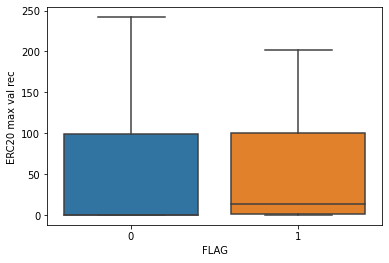

count    7.608000e+03
mean     1.451480e+08
std      1.146602e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.951556e+01
max      1.000000e+12
Name: ERC20 max val rec, dtype: float64
count    1.107000e+03
mean     2.071435e+07
std      6.328619e+08
min      0.000000e+00
25%      1.337000e+00
50%      1.337000e+01
75%      1.000000e+02
max      2.100000e+10
Name: ERC20 max val rec, dtype: float64
(0.36097862804458264, 0.7181241753689631)


In [32]:
#'ERC20 max val rec' vs target 
sns.boxplot(y="ERC20 max val rec", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for ERC20 max val rec
print((df.loc[df["FLAG"] == 0,"ERC20 max val rec"]).describe())
print((df.loc[df["FLAG"] == 1,"ERC20 max val rec"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"ERC20 max val rec"], df.loc[df["FLAG"] == 1,"ERC20 max val rec"])
print((stat, p))

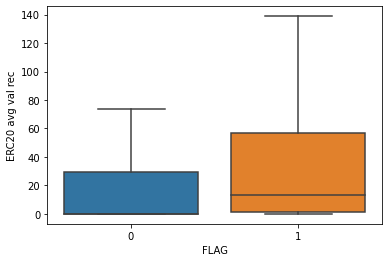

count    7.608000e+03
mean     3.634511e+06
std      1.993467e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.940009e+01
max      1.724181e+10
Name: ERC20 avg val rec, dtype: float64
count    1.107000e+03
mean     1.020285e+07
std      3.164247e+08
min      0.000000e+00
25%      1.337000e+00
50%      1.337000e+01
75%      5.668500e+01
max      1.050000e+10
Name: ERC20 avg val rec, dtype: float64
(-0.9378263113998253, 0.3483596718090539)


In [33]:
#'ERC20 avg val rec' vs target 
sns.boxplot(y="ERC20 avg val rec", x= "FLAG", data=df, showfliers=False)
plt.show()

#Stats for ERC20 avg val rec
print((df.loc[df["FLAG"] == 0,"ERC20 avg val rec"]).describe())
print((df.loc[df["FLAG"] == 1,"ERC20 avg val rec"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"ERC20 avg val rec"], df.loc[df["FLAG"] == 1,"ERC20 avg val rec"])
print((stat, p))

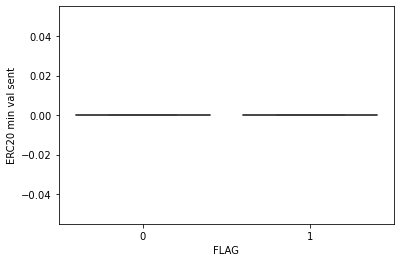

7965


In [34]:
#'ERC20 min val sent' vs target 
sns.boxplot(y="ERC20 min val sent", x= "FLAG", data=df, showfliers=False)
plt.show()

#ERC20 min val sent: Number of values equal to 0
print(df[df["ERC20 min val sent"] == 0].value_counts().sum())

The vast majority of values in the 'ERC20 min val sent' column is equal 0 (i.e., 91%). This explains the resulting boxplot above; as such, the probability that this feature exhibits any predictive power will be low.

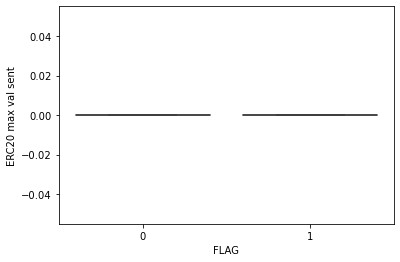

7259


In [35]:
#'ERC20 max val sent' vs target 
sns.boxplot(y="ERC20 max val sent", x= "FLAG", data=df, showfliers=False)
plt.show()

#ERC20 max val sent: Number of values equal to 0
print(df[df["ERC20 max val sent"] == 0].value_counts().sum())

The vast majority of values in the 'ERC20 max val sent' column is equal 0 (i.e., 83%). This explains the resulting boxplot above; as such, the probability that this feature exhibits any predictive power will be low.

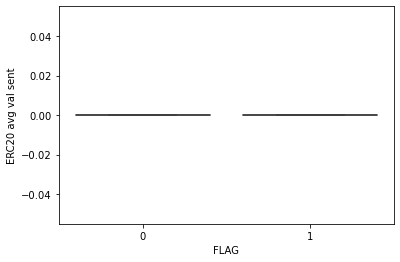

7268


In [36]:
#'ERC20 avg val sent' vs target 
sns.boxplot(y="ERC20 avg val sent", x= "FLAG", data=df, showfliers=False)
plt.show()

#ERC20 avg val sent: Number of values equal to 0
print(df[df["ERC20 avg val sent"] == 0].value_counts().sum())

The vast majority of values in the 'ERC20 avg val sent' column is equal 0 (i.e., 83%). This explains the resulting boxplot above; as such, the probability that this feature exhibits any predictive power will be low.

In [37]:
#Delete the following columns: Number of Created Contracts, ERC20 total ether sent, ERC20 uniq sent addr, ERC20 min val sent, ERC20 max val sent, ERC20 avg val sent
df = df.drop(columns=["Number of Created Contracts", "ERC20 total ether sent", "ERC20 uniq sent addr", "ERC20 min val sent", "ERC20 max val sent", "ERC20 avg val sent"])
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec
0,0,844.26,1093.71,704785.63,721,89,40,118,0.000000,45.806785,...,865.691093,586.466675,-279.224419,265.0,3.558854e+07,54.0,58.0,0.0,1.500000e+07,265586.147600
1,0,12709.07,2958.44,1218216.73,94,8,5,14,0.000000,2.613269,...,3.087297,3.085478,-0.001819,8.0,4.034283e+02,5.0,7.0,0.0,3.650000e+02,57.632615
2,0,246194.54,2434.02,516729.30,2,10,10,2,0.113119,1.165453,...,3.588616,3.589057,0.000441,8.0,5.215121e+02,7.0,8.0,0.0,4.428198e+02,65.189009
3,0,10219.60,15785.09,397555.90,25,9,7,13,0.000000,500.000000,...,1750.045862,895.399559,-854.646303,14.0,1.711105e+04,11.0,11.0,0.0,1.141223e+04,1555.550174
4,0,36.61,10707.77,382472.42,4598,20,7,19,0.000000,12.802411,...,104.318883,53.421897,-50.896986,42.0,1.628297e+05,23.0,27.0,0.0,9.000000e+04,4934.232147


In [38]:
#Delete features that do not demonstrate statistical significant differences between the nonfraudulent and fraudulent accounts
df = df.drop(columns=["Avg min between sent tnx", "Unique Received From Addresses", "min value received", "max value received", "avg val received", "min val sent", "max val sent", "total Ether sent", "total ether received", "total ether balance", "ERC20 total Ether received", "ERC20 uniq rec addr", "ERC20 uniq rec contract addr", "ERC20 min val rec", "ERC20 max val rec", "ERC20 avg val rec"])
df.head()

,FLAG,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Sent To Addresses,avg val sent,total transactions (including tnx to create contract,Total ERC20 tnxs
0,0,1093.71,704785.63,721,89,118,1.200681,810,265.0
1,0,2958.44,1218216.73,94,8,14,0.032844,102,8.0
2,0,2434.02,516729.30,2,10,2,1.794308,12,8.0
3,0,15785.09,397555.90,25,9,13,70.001834,34,14.0
4,0,10707.77,382472.42,4598,20,19,0.022688,4619,42.0


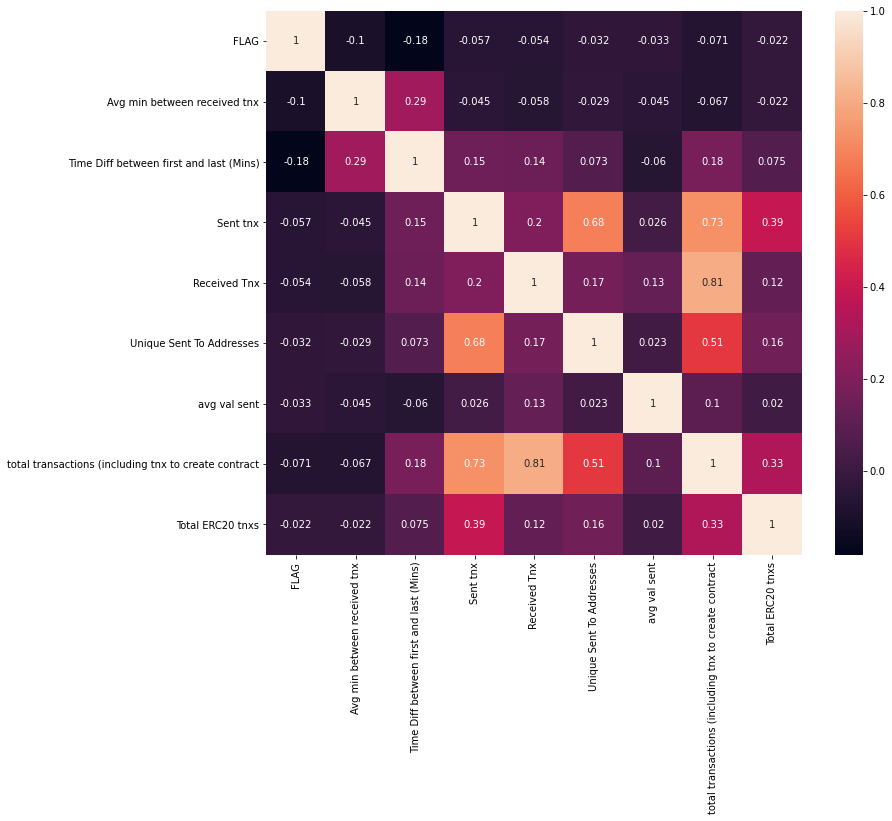

In [39]:
#Correlation Heatmap
plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

In [40]:
df_minus_target = df.drop(['FLAG'], axis=1)
df_minus_target.head()

,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Unique Sent To Addresses,avg val sent,total transactions (including tnx to create contract,Total ERC20 tnxs
0,1093.71,704785.63,721,89,118,1.200681,810,265.0
1,2958.44,1218216.73,94,8,14,0.032844,102,8.0
2,2434.02,516729.30,2,10,2,1.794308,12,8.0
3,15785.09,397555.90,25,9,13,70.001834,34,14.0
4,10707.77,382472.42,4598,20,19,0.022688,4619,42.0


In [41]:
#Plot feature importances
# Subset data into dependent and independent variables
X = df_minus_target
y = df['FLAG']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [42]:
#Fit Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

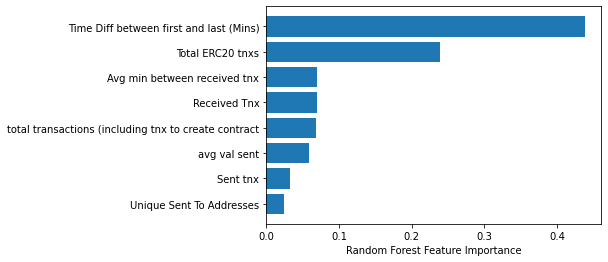

In [43]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

APPENDIX

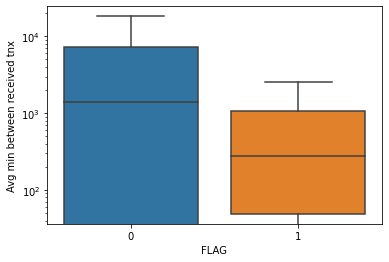

count      7608.000000
mean       9420.261551
std       25092.320271
min           0.000000
25%           0.000000
50%        1410.955000
75%        7315.922500
max      482175.490000
Name: Avg min between received tnx, dtype: float64
count     1107.000000
mean      2218.985438
std       7612.258858
min          0.000000
25%         48.755000
50%        278.140000
75%       1060.365000
max      97592.180000
Name: Avg min between received tnx, dtype: float64
(9.484944349412594, 3.0698623786265935e-21)


In [44]:
#Log scale
#'Avg min between received tnx' vs target 
fig = sns.boxplot(y="Avg min between received tnx", x= "FLAG", data=df, showfliers=False)
fig.set_yscale('log')
plt.show()

#Stats for Avg min between received tnx
print((df.loc[df["FLAG"] == 0,"Avg min between received tnx"]).describe())
print((df.loc[df["FLAG"] == 1,"Avg min between received tnx"]).describe())

#Significance Testing: Calculate p-value for two sampled T-test
from scipy.stats import ttest_ind
stat, p = ttest_ind(df.loc[df["FLAG"] == 0,"Avg min between received tnx"], df.loc[df["FLAG"] == 1,"Avg min between received tnx"])
print((stat, p))